# Pre-Processing

In [1]:
# necessary imports
import pandas as pd
import numpy as np

In [2]:
# Reading files
t_claim = pd.read_csv("../input/Train_ClaimDetails.csv")
t_policy_demo = pd.read_csv("../input/Train_Policy_Demographics.csv")
t_train = pd.read_csv("../input/Train.csv")

In [3]:
# merging multiple dataframes with ClaimID
dfs = [t_claim, t_policy_demo, t_train]
from functools import reduce
df_final2 = reduce(lambda left,right: pd.merge(left,right,on='ClaimID'), dfs)
ClaimID = df_final2['ClaimID']

In [4]:
# Removing redundent variables
# ClaimID, PolicyID
df_final = df_final2.drop(['ClaimID', 'PolicyID'], axis = 1)

In [5]:
# converting date variables to date objects
df_final = df_final.astype({'Injury_Date':'datetime64', 'Date_reported': 'datetime64'})

In [6]:
# taking time difference
time_diff = df_final['Date_reported'] - df_final['Injury_Date']
df_final['time_diff'] = time_diff.astype('str').str.split(" ").str[0]

In [7]:
# dropping date variables after taking day differences
df_final.drop(['Injury_Date', 'Date_reported'], axis = 1, inplace = True)

In [8]:
# droping age_injured because the given format and the numbers does fit together
df_final.drop(['Age_Injured'], axis = 1, inplace = True)

In [9]:
# since the needed target is different from what's there, cleaning the target variables 
df_final.loc[:, 'ClaimSize'] = df_final.loc[:, 'ClaimSize'].astype('category')
df_final.drop(df_final.loc[(df_final['ClaimSize'] == '3') | (df_final['ClaimSize'] == '2') |\
               (df_final['ClaimSize'] == '1')].index, axis = 0, inplace = True)

In [10]:
# Strategy is to fill NaN's with zero where there is one element in a row and remaining are NaN's with the nested dict.
df_sparse = df_final.replace({'Work_related_injury_status': {'N':0, 'Y':1},\
                  'Amputation': {'B': 1, np.nan: 0},\
                  'Death' : {'A' : 1, np.nan: 0},\
                  'Burns_heat' : {'C' :1, np.nan: 0},\
                  'Burns_chemical' : {'D' :1, np.nan: 0},\
                  'SystemicPoisoning_toxic' : {'E' :1, np.nan: 0},\
                  'SystemicPoisoning_other' : {'F' :1, np.nan: 0},\
                  'Eye_injury_blindness' : {'G' :1, np.nan: 0},\
                  'RespiratoryCondition' : {'H' :1, np.nan: 0},\
                  'NervousCondition' : {'I' :1, np.nan: 0},\
                  'HearingLoss': {'J' :1, np.nan: 0},\
                  'CirculatoryCondition' : {'K':1, np.nan:0},\
                  'MultipleInjuries' : {'L':1, np.nan:0},\
                  'BackInjury' : {'M':1, np.nan:0},\
                  'SkinDisorder': {'N':1, np.nan:0},\
                  'BrainDamage' : {'O':1, np.nan:0},\
                  'Scarring' : {'P':1, np.nan:0},\
                  'SpinalCordInjuries' : {'Q':1, np.nan:0},\
                  'OtherInjuries' : {'R':1, np.nan:0},\
                  'OffRoadVehicle' : {'A':1, np.nan:0},\
                  'AirTransportation' : {'B':1, np.nan:0},\
                  'Railway' : {'C' :1, np.nan: 0},\
                  'OtherMotorVehicle' : {'D' :1, np.nan: 0},\
                  'SurgicalCare' : {'E' :1, np.nan: 0},\
                  'Falls' : {'F' :1, np.nan: 0},\
                  'Drowning' : {'G' :1, np.nan: 0},\
                  'UseOfDefectiveProduct' : {'H' :1, np.nan: 0},\
                  'Fire' : {'I' :1, np.nan: 0},\
                  'Firearm': {'J' :1, np.nan: 0},\
                  'Pollution_ToxicExposure' : {'K':1, np.nan:0},\
                  'Explosions' : {'L':1, np.nan:0},\
                  'UseOfAgrlMachinery' : {'M':1, np.nan:0},\
                  'Oil_gasExtraction': {'N':1, np.nan:0},\
                  'OtherModeOfInjury' : {'O':1, np.nan:0},\
                  
                  'MedicalInsurance' : {'Y':1, np.nan:0},\
                  'DisabilityInsurance' : {'Y':1, np.nan:0},\
                  'SocialSecurityBenefits' : {'Y':1, np.nan:0},\
                  'Medicare_Medicaid' : {'Y':1, np.nan:0},\
                  'OtherCollateralSources' : {'Y':1, np.nan:0}})
                  
                  
                 

In [11]:
# extracting the target
df_sparse_target = df_sparse['ClaimSize']

In [12]:
# dropping it since we already extracted target and needed to send the df to dummy function
df_sparse.drop(['ClaimSize'], axis = 1, inplace = True)

In [13]:
# some type conversions, since get_dummies do dummies with categorical and object dtypes 
df_sparse.loc[:, 'time_diff'] = df_sparse.loc[:, 'time_diff'].astype('int')

In [14]:
# this has NA's and I don't find a reasonable argument to impute with
df_sparse.drop(['Work_related_injury_status'], axis = 1, inplace = True)

In [15]:
# some variables to categorical and dummifying
cat = ['PolicyType', 'PolicyForm', 'BusinessClass', 'Non_economicloss', \
       'Exemplarydamages', 'WhetherPrimaFacie_JointandSeveralLiability', \
      'WorkersCompAvailability', 'CollateralSourcesAvailability', \
      'Anyothercontributors', 'AnyMultipleInterestedparties',\
      'Employment_status']

df_sparse.loc[:, cat] = df_sparse.loc[:, cat].astype('category')
df_model = pd.get_dummies(df_sparse)

# Some Exploratory Plotting

In [16]:
# necessary imports
import matplotlib.pyplot as plt
import seaborn as sns

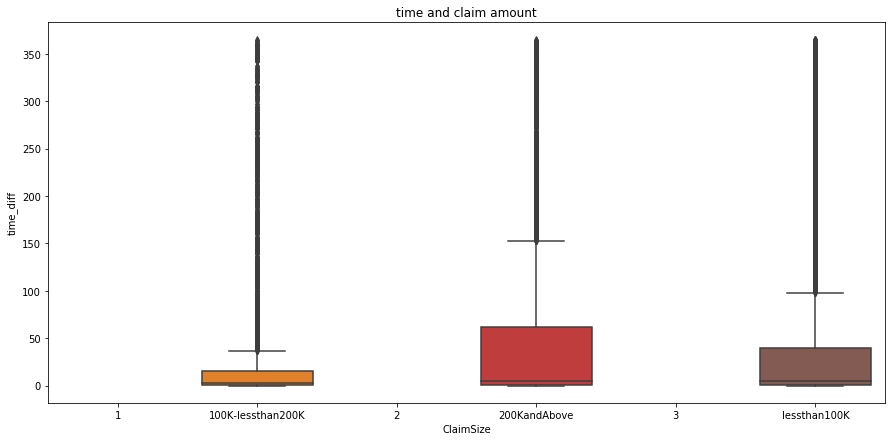

In [17]:
# Does some one who took more time to claim, claim higher ?
plt.figure(figsize = (15, 7))
sns.boxplot(df_sparse_target, df_sparse.time_diff)
plt.title("time and claim amount")
plt.show()

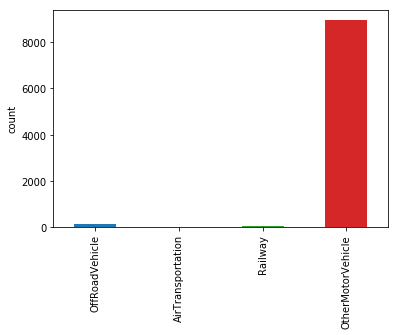

In [18]:
# mode of transport
df_model.iloc[:, 18:22].sum().plot(kind = 'bar')
plt.ylabel("count")
plt.show()

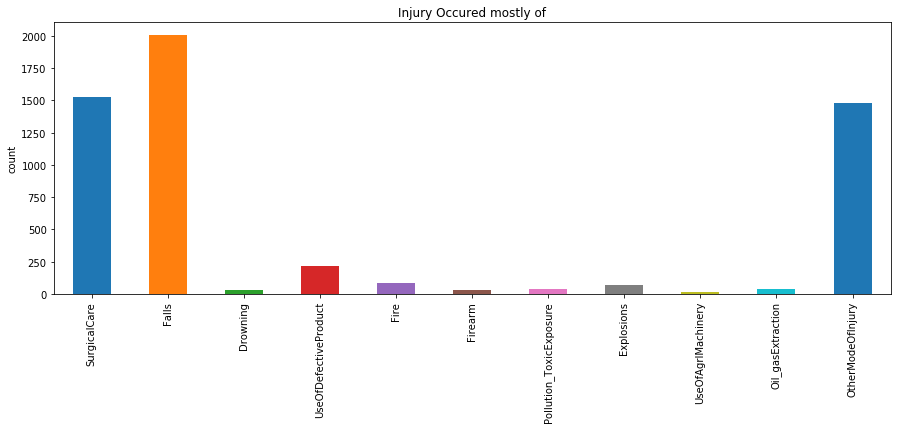

In [19]:
# How the injury has occured
plt.figure(figsize = (15, 5))
df_model.iloc[:, 22:33].sum().plot(kind = 'bar')
plt.ylabel("count")
plt.title("Injury Occured mostly of")
plt.show()

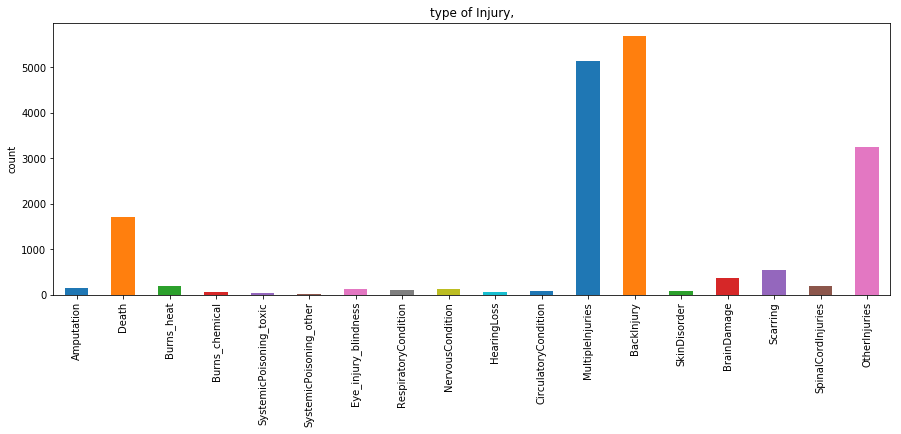

In [20]:
# type of Injury
plt.figure(figsize = (15, 5))
df_model.iloc[:, :18].sum().plot(kind = 'bar')
plt.ylabel("count")
plt.title("type of Injury,")
plt.show()

From above the insurance company can reduce the insurance coverage on things where the count is higher in their new draft

# Model Building

In [21]:
# doing the train and validation split
from sklearn.model_selection import train_test_split

In [22]:
X_train, x_test, Y_train, y_test = train_test_split(df_model, df_sparse_target)

In [23]:
# Scaling the remaining numerical variables, since it has some big numbers on different scales
num = ['PolicyLimitPerInjury', 'PrimaFacie_percentagefault_uninsured', \
       'PrimaFacie_percentagefault_otherinsured', 'PrimaFacie_percentagefault_insured',\
      'PrimaFacie_percentagefault_injured', 'CombinedSingleLimit', 'PerOccurrence_PolicyLimit', 'Perperson_Policylimit']

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train.loc[:, num])
X_train.loc[:, num] = scale.transform(X_train.loc[:, num])
x_test.loc[:, num] = scale.transform(x_test.loc[:, num])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning

In [24]:
# Implementing logistic Regression, LogReg taking the threshold >0.5
from sklearn.linear_model import LogisticRegression
LReg = LogisticRegression()

# fitting the regression
LReg.fit(X_train, Y_train)

# predicting on train and validation
pred_lreg_train = LReg.predict(X_train)
pred_lreg_test = LReg.predict(x_test)

# checking the metric of interest
from sklearn.metrics import accuracy_score
print("Accuracy on train", " ", accuracy_score(Y_train, pred_lreg_train))
print("Accuracy on validation", " ", accuracy_score(y_test, pred_lreg_test))

# I don't see much difference in accuracy So, I see there is no bias-variance problem

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy on train   0.6914725804954996
Accuracy on validation   0.6949624269412747


In [25]:
# Building RandomForest 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# fitting the train data
clf.fit(X_train, Y_train)

# predicting on train and validation
clf_pred_train = clf.predict(X_train)
clf_pred_test = clf.predict(x_test)

# checking the metric of interest
print("Accuracy on train", " ", accuracy_score(Y_train, clf_pred_train))
print("Accuracy on validation", " ", accuracy_score(y_test, clf_pred_test))

# Since there is a huge difference in trian and validation split we go with GridSearch for right hyper-parameters

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on train   0.9482230676440568
Accuracy on validation   0.6738101864736988


In [26]:
from sklearn.model_selection import GridSearchCV
# taking interested hyper parameters
param = { "n_estimators" : [10, 40, 70, 90], \
         "max_depth" : [7, 9, 12], \
         "min_samples_leaf" : [2, 3, 4]}
 
rfc_cv_grid = GridSearchCV(estimator = clf, param_grid = param, cv = 10)
# Fitting data
rfc_cv_grid.fit(X = X_train, y = Y_train)

# taking the best score parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

# predicting with best parameters
pred_lreg_train = rfc_cv_grid.predict(X_train)
pred_lreg_test = rfc_cv_grid.predict(x_test)

# accuracy scores
print(accuracy_score(Y_train, pred_lreg_train))
print(accuracy_score(y_test, pred_lreg_test))

# With this there is no Bias-variance problem

0.7010299712350376 {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 70}
0.7325786396956482
0.68939604787086


In [27]:
# Building the model with complete train data with best hyper parameters of RandomForest extracted from GridSearchCV, 
# This is to train model on more data for better prediction on test

# Scaling the train.csv
scale = StandardScaler()
scale.fit(df_model.loc[:, num])
df_model.loc[:, num] = scale.transform(df_model.loc[:, num])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [28]:
# Fitting the model
clf.fit(df_model, df_sparse_target)

# the prediction score should be completely ignored 
clf_total = clf.predict(df_model)
print(accuracy_score(df_sparse_target, clf_total))


0.9432150313152401


#Going with the Random Forest because of higher accuracy than Logistic Regr.
# Getting Prediction on Test data

In [29]:
# Readin data
t1 = pd.read_csv("../input/Test_Policy_Demographics.csv")
t2 = pd.read_csv("../input/Test.csv")
t3 = pd.read_csv("../input/Test_ClaimDetails.csv")
dfs_test = [t1, t2, t3]
df_final_test2 = reduce(lambda left,right: pd.merge(left,right,on='ClaimID'), dfs_test)
claimID = df_final_test2['ClaimID']
df_final_test = df_final_test2.drop(['ClaimID', 'PolicyID'], axis = 1)

In [30]:
df_final_test = df_final_test.astype({'Injury_Date':'datetime64', 'Date_reported': 'datetime64'})
time_diff = df_final_test['Date_reported'] - df_final_test['Injury_Date']
df_final_test['time_diff'] = time_diff.astype('str').str.split(" ").str[0]
df_final_test.drop(['Injury_Date', 'Date_reported'], axis = 1, inplace = True)
df_final_test.drop(['Age_Injured'], axis = 1, inplace = True)

In [31]:
# Strategy is to fill NA's with zero 
df_sparse_test = df_final_test.replace({'Work_related_injury_status': {'N':0, 'Y':1},\
                  'Amputation': {'B': 1, np.nan: 0},\
                  'Death' : {'A' : 1, np.nan: 0},\
                  'Burns_heat' : {'C' :1, np.nan: 0},\
                  'Burns_chemical' : {'D' :1, np.nan: 0},\
                  'SystemicPoisoning_toxic' : {'E' :1, np.nan: 0},\
                  'SystemicPoisoning_other' : {'F' :1, np.nan: 0},\
                  'Eye_injury_blindness' : {'G' :1, np.nan: 0},\
                  'RespiratoryCondition' : {'H' :1, np.nan: 0},\
                  'NervousCondition' : {'I' :1, np.nan: 0},\
                  'HearingLoss': {'J' :1, np.nan: 0},\
                  'CirculatoryCondition' : {'K':1, np.nan:0},\
                  'MultipleInjuries' : {'L':1, np.nan:0},\
                  'BackInjury' : {'M':1, np.nan:0},\
                  'SkinDisorder': {'N':1, np.nan:0},\
                  'BrainDamage' : {'O':1, np.nan:0},\
                  'Scarring' : {'P':1, np.nan:0},\
                  'SpinalCordInjuries' : {'Q':1, np.nan:0},\
                  'OtherInjuries' : {'R':1, np.nan:0},\
                  'OffRoadVehicle' : {'A':1, np.nan:0},\
                  'AirTransportation' : {'B':1, np.nan:0},\
                  'Railway' : {'C' :1, np.nan: 0},\
                  'OtherMotorVehicle' : {'D' :1, np.nan: 0},\
                  'SurgicalCare' : {'E' :1, np.nan: 0},\
                  'Falls' : {'F' :1, np.nan: 0},\
                  'Drowning' : {'G' :1, np.nan: 0},\
                  'UseOfDefectiveProduct' : {'H' :1, np.nan: 0},\
                  'Fire' : {'I' :1, np.nan: 0},\
                  'Firearm': {'J' :1, np.nan: 0},\
                  'Pollution_ToxicExposure' : {'K':1, np.nan:0},\
                  'Explosions' : {'L':1, np.nan:0},\
                  'UseOfAgrlMachinery' : {'M':1, np.nan:0},\
                  'Oil_gasExtraction': {'N':1, np.nan:0},\
                  'OtherModeOfInjury' : {'O':1, np.nan:0},\
                  
                  'MedicalInsurance' : {'Y':1, np.nan:0},\
                  'DisabilityInsurance' : {'Y':1, np.nan:0},\
                  'SocialSecurityBenefits' : {'Y':1, np.nan:0},\
                  'Medicare_Medicaid' : {'Y':1, np.nan:0},\
                  'OtherCollateralSources' : {'Y':1, np.nan:0}})
                  

In [32]:
cat = ['PolicyType', 'PolicyForm', 'BusinessClass', 'Non_economicloss', \
       'Exemplarydamages', 'WhetherPrimaFacie_JointandSeveralLiability', \
      'WorkersCompAvailability', 'CollateralSourcesAvailability', \
      'Anyothercontributors', 'AnyMultipleInterestedparties',\
      'Employment_status']

df_sparse_test.loc[:, 'time_diff'] = df_sparse_test.loc[:, 'time_diff'].astype('int')
df_sparse_test.drop(['Work_related_injury_status'], axis = 1, inplace = True)
df_sparse_test.loc[:, cat] = df_sparse.loc[:, cat].astype('category')
df_model_test = pd.get_dummies(df_sparse_test)
df_model_test.shape

(4806, 95)

In [33]:
num = ['PolicyLimitPerInjury', 'PrimaFacie_percentagefault_uninsured', \
       'PrimaFacie_percentagefault_otherinsured', 'PrimaFacie_percentagefault_insured',\
      'PrimaFacie_percentagefault_injured', 'CombinedSingleLimit', 'PerOccurrence_PolicyLimit', 'Perperson_Policylimit']
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_model_test.loc[:, num] = scale.fit_transform(df_model_test.loc[:, num])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
# Doing necessary predictions
pred = clf.predict(df_model_test)
sub = pd.DataFrame({'ClaimSize':pred}, index = claimID)

In [35]:
import base64
import html
from IPython.display import HTML

In [36]:
# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "prediction.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


# create a link to download the dataframe
create_download_link(sub)